<h3 style='text-align:center'>Optimisation Metaheuristiques - Data Generation + Offloading + Pareto</h3>

---

#### LIBRARIES

In [1]:
import os
import json
import math
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from utils.data_generation import setEnvironment_FOG, setEnvironment_CLOUD, setEnvironment_IoT_n_TASKS
from utils.prepare_offloading import prepareOffloading

#### FUNCTIONS

In [2]:
def displayPareto(taskVM_TRANSPOSE):
    rank_ = 1
    taskVM_TRANSPOSE['RANK'] = None

    while None in set(taskVM_TRANSPOSE['RANK']):
        df_coords_slct = taskVM_TRANSPOSE[taskVM_TRANSPOSE['RANK'].isnull()]
        dict_ = {}
        for i, row in df_coords_slct.iterrows():
            lsPareto = [0]
            for i_bis, row_bis in df_coords_slct.iterrows():
                if i == i_bis:
                    continue
                
                if row.F1 < row_bis.F1 or row.F2 < row_bis.F2:
                    lsPareto.append(1)

            dict_[row['TASK']] = sum(lsPareto)

        lsVal = list(filter(lambda key_ : dict_[key_] == max(dict_.values()), dict_.keys()))
        for point_ in lsVal:
            taskVM_TRANSPOSE['RANK'][taskVM_TRANSPOSE[taskVM_TRANSPOSE['TASK']==point_].index[0]] = rank_
        rank_ += 1
    return taskVM_TRANSPOSE

#### **Generation Offloading** - Try 1 

In [3]:
n_IoTs = 20
FOG_nNodes = 5
CLOUD_nNodes = 2
IoT_rDist=((0,50), (0,50))
FOG_rDist = ((0,50), (0,50))
CLOUD_rDist = ((100, 500), (100, 500))
FOG_rVMS = (2, 6)
CLOUD_rVMS = (1,3)
baseVMS, taskVM, taskVM_Dummy, taskVM_Transp = prepareOffloading(n_IoTs, FOG_nNodes, CLOUD_nNodes, IoT_rDist, FOG_rDist, CLOUD_rDist, FOG_rVMS, CLOUD_rVMS)

40 6 6.666666666666667
6
6
38 2 19.0
2
2
49 4 12.25
4
4
24 6 4.0
6
6
45 6 7.5
6
6
40 6 6.666666666666667
6
6
18 6 3.0
6
6
35 4 8.75
4
4
44 6 7.333333333333333
6
6
17 6 2.8333333333333335
6
6
34 6 5.666666666666667
6
6
43 2 21.5
2
2
Data are stored within the following Folder → Generation_1


In [4]:
taskVM_Transp.head()

,TASK,VM,F1,F2
0,I01_T01,F03_VM02,0.656024,1480.3152
1,I02_T01,F01_VM03,0.150981,6157.168
2,I03_T01,F03_VM03,0.392185,2225.5976
3,I04_T01,F05_VM01,0.640144,2598.724
4,I05_T01,F01_VM04,0.052675,17157.4288


#### **Display Pareto** - Try 1 

In [5]:
taskVM_TRANSPOSE = displayPareto(taskVM_Transp)

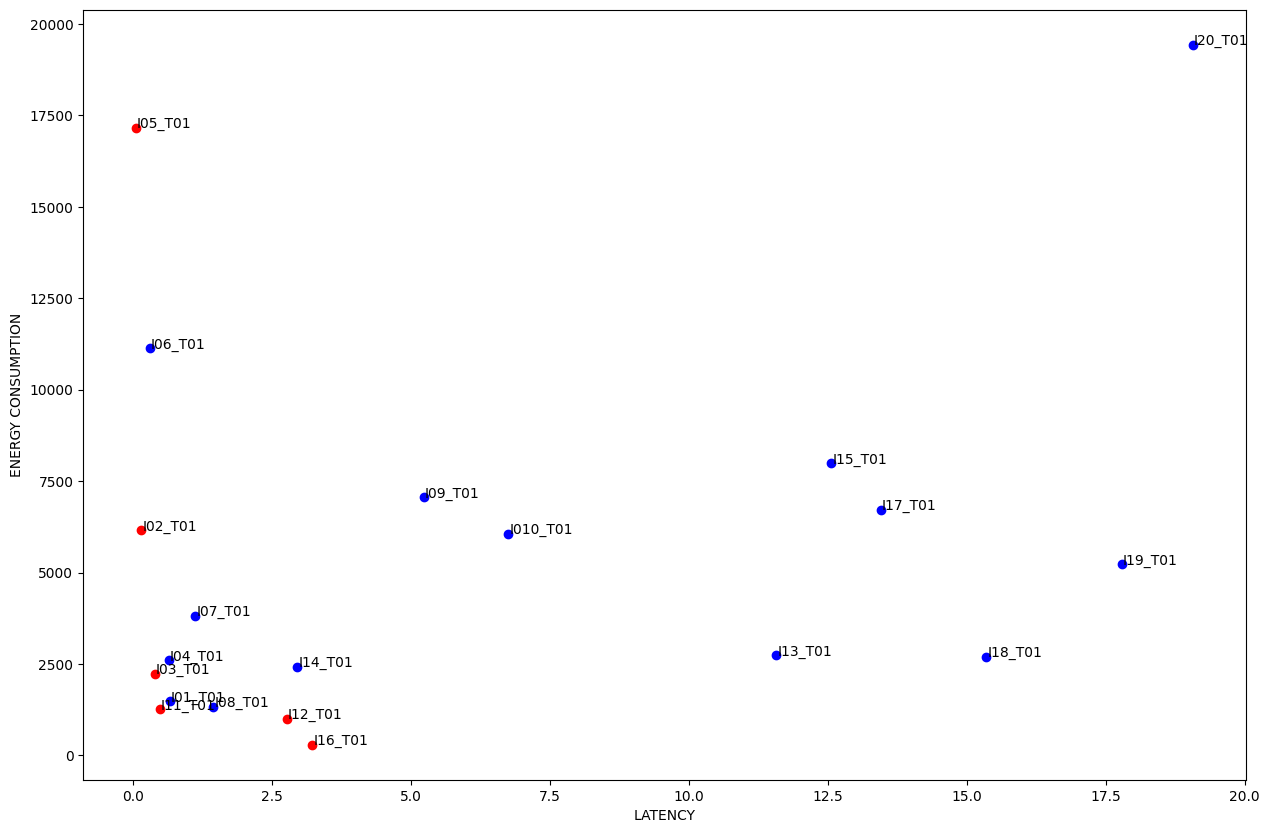

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))

for i, row in taskVM_TRANSPOSE.iterrows():
    ax.annotate(row['TASK'], (row['F1']+0.02, row['F2']), fontsize=10)
    if row.RANK == 1:
        ax.scatter(row['F1'], row['F2'], color='red')
    else:
        ax.scatter(row['F1'], row['F2'], color='blue')


plt.xlabel('LATENCY')
plt.ylabel('ENERGY CONSUMPTION')
plt.show()